In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/ML & DL/Projects/Churn Modelling/Churn_Modelling.csv")
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
# df['Geography'].
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


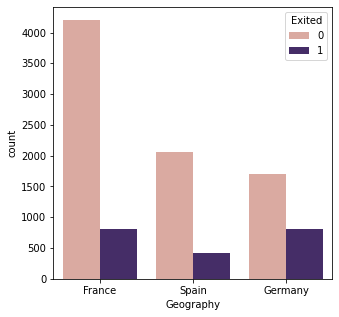

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot('Geography',hue='Exited',data=df, palette=['#E4A497','#432371'])
plt.show()

In [ ]:
df['Geography'].replace({'France':1, 'Spain':0, 'Germany':2},inplace=True)
df['Gender'].replace({'Male':0, 'Female':1},inplace=True)

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,1,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,0,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,1,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,1,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,0,1,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
x=df.iloc[:,3:13]
y=df.iloc[:,13]

In [ ]:
from keras import Sequential
from keras.layers import Dense, Dropout
from keras.losses import BinaryCrossentropy
from keras.activations import sigmoid, relu
from keras.optimizers import adam_v2
from keras.metrics import BinaryAccuracy,Accuracy

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=0)

In [ ]:
# x_test

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [ ]:
def nn():
  model=Sequential()
  model.add(Dense(kernel_initializer='he_uniform',input_dim=10,units=6,activation='relu'))
# model2.add(Dropout(0.4))
  model.add(Dense(kernel_initializer='he_uniform',input_dim=6,units=12,activation='relu'))
  model.add(Dense(kernel_initializer='he_uniform',input_dim=12,units=6,activation='relu'))
  model.add(Dense(kernel_initializer='he_uniform',input_dim=6,units=1,activation='sigmoid'))
  model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics='Accuracy')
  model_history=model.fit(x_train,y_train,batch_size=10,epochs=100,validation_split=0.25)

Epoch 1/100
600/600 [==============================] - 9s 9ms/step - loss: 0.5101 - Accuracy: 0.7918 - val_loss: 0.4754 - val_Accuracy: 0.7995
Epoch 2/100
600/600 [==============================] - 5s 8ms/step - loss: 0.4627 - Accuracy: 0.7948 - val_loss: 0.4576 - val_Accuracy: 0.7995
Epoch 3/100
600/600 [==============================] - 4s 6ms/step - loss: 0.4480 - Accuracy: 0.7948 - val_loss: 0.4486 - val_Accuracy: 0.7995
Epoch 4/100
600/600 [==============================] - 2s 4ms/step - loss: 0.4400 - Accuracy: 0.7963 - val_loss: 0.4428 - val_Accuracy: 0.8010
Epoch 5/100
600/600 [==============================] - 2s 4ms/step - loss: 0.4351 - Accuracy: 0.8020 - val_loss: 0.4409 - val_Accuracy: 0.8000
Epoch 6/100
600/600 [==============================] - 2s 4ms/step - loss: 0.4311 - Accuracy: 0.8083 - val_loss: 0.4382 - val_Accuracy: 0.8010
Epoch 7/100
600/600 [==============================] - 2s 4ms/step - loss: 0.4272 - Accuracy: 0.8143 - val_loss: 0.4336 - val_Accuracy: 0.8150

<built-in method keys of dict object at 0x7faba05d8870>


<function matplotlib.pyplot.show>

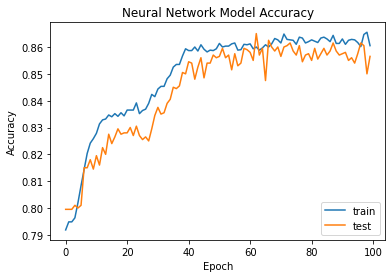

In [ ]:
print(model_history.history.keys)
plt.plot(model_history.history['Accuracy'])
plt.plot(model_history.history['val_Accuracy'])
plt.title('Neural Network Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','test'],loc='lower right')
plt.show

In [ ]:
y_pred=model.predict(x_test)
y_pred=(y_pred>0.5)

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print(score)

0.8625


In [ ]:
model=Sequential()
model.add(Dense(kernel_initializer='he_normal',input_dim=10,units=6,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(kernel_initializer='he_normal',input_dim=6,units=12,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(kernel_initializer='he_normal',input_dim=12,units=6,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(kernel_initializer='glorot_uniform',input_dim=6,units=1,activation='sigmoid'))
model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics='Accuracy')
model_history=model.fit(x_train,y_train,batch_size=10,epochs=100,validation_split=0.25)

Epoch 1/100
600/600 [==============================] - 3s 4ms/step - loss: 0.5602 - Accuracy: 0.7767 - val_loss: 0.5015 - val_Accuracy: 0.7995
Epoch 2/100
600/600 [==============================] - 3s 4ms/step - loss: 0.5172 - Accuracy: 0.7933 - val_loss: 0.4796 - val_Accuracy: 0.7995
Epoch 3/100
600/600 [==============================] - 3s 4ms/step - loss: 0.5040 - Accuracy: 0.7947 - val_loss: 0.4719 - val_Accuracy: 0.7995
Epoch 4/100
600/600 [==============================] - 3s 4ms/step - loss: 0.4924 - Accuracy: 0.7948 - val_loss: 0.4664 - val_Accuracy: 0.7995
Epoch 5/100
600/600 [==============================] - 2s 4ms/step - loss: 0.4823 - Accuracy: 0.7948 - val_loss: 0.4580 - val_Accuracy: 0.7995
Epoch 6/100
600/600 [==============================] - 3s 4ms/step - loss: 0.4820 - Accuracy: 0.7948 - val_loss: 0.4574 - val_Accuracy: 0.7995
Epoch 7/100
600/600 [==============================] - 2s 4ms/step - loss: 0.4745 - Accuracy: 0.7948 - val_loss: 0.4514 - val_Accuracy: 0.7995

In [ ]:
!pip install scikeras

  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.10.1
    Uninstalling importlib-metadata-4.10.1:
      Successfully uninstalled importlib-metadata-4.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
markdown 3.3.6 requires importlib-metadata>=4.4; python_version < "3.10", but you have importlib-metadata 3.10.1 which is incompatible.


In [ ]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
def create_model(layers):
  model=Sequential()
  for i,nodes in enumerate(layers):
    if i==0:
      model.add(Dense(nodes,input_dim=x_train.shape[1],activation='relu'))
      model.add(Dropout(0.3))
    else:
      model.add(Dense(nodes,activation='relu'))
      model.add(Dropout(0.3))
  model.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))
  model.compile(optimizer='adam',loss='BinaryCrossentropy',metrics=['accuracy'])
  return model

In [ ]:
layers=[45,30,15]
# activations=["sigmoid","relu"]
param_grid=dict(batch_size=[150,250],epochs=[100])
model=KerasClassifier(model=create_model,verbose=0,layers=layers)

In [ ]:

grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=5)
# activation=activations

In [ ]:
grid_result=grid.fit(x_train,y_train)

In [ ]:
print(grid_result.best_score_,grid_result.best_params_)

0.8602500000000001 {'batch_size': 150, 'epochs': 100}


In [ ]:
y_pre=grid.predict(x_test)
y_pred=(y_pre>0.5)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
cm=confusion_matrix(y_pred,y_test)
score=accuracy_score(y_pred,y_test)
print(score)

0.863


In [ ]:
def build_model(hp):
  model=Sequential()
  for i in range(hp.Int('num_layers',2,20)):
    model.add(Dense(units=hp.Int('units_'+str(i),min_value=32,max_value=512,step=32),activation='relu'))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics='Accuracy')
  return model
# hp.Choice('learning_rate',[1e-2,1e-3,1e-4])

In [ ]:
!pip install keras-tuner

     |████████████████████████████████| 98 kB 3.2 MB/s 
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.1
    Uninstalling importlib-metadata-3.10.1:
      Successfully uninstalled importlib-metadata-3.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikeras 0.6.0 requires importlib-metadata<4,>=3; python_version < "3.8", but you have importlib-metadata 4.11.0 which is incompatible.


In [ ]:
from keras_tuner.tuners import RandomSearch

In [ ]:
# tuner=tuners()
tuner=RandomSearch(
    build_model,
    objective='Accuracy',
    max_trials=10,
    executions_per_trial=5,
    directory='Churn Modelling',
    project_name='Churn-Modelling'
    # tuner.search_space_memory
)

In [ ]:
tuner.search(x_train,y_train,epochs=50,validation_data=(x_test,y_test))

Trial 10 Complete [00h 10m 43s]
Accuracy: 0.9461749911308288

Best Accuracy So Far: 0.9780250072479248
Total elapsed time: 01h 21m 37s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary()

Results summary
Results in Churn Modelling/Churn-Modelling
Showing 10 best trials
Objective(name='Accuracy', direction='max')
Trial summary
Hyperparameters:
num_layers: 5
units_0: 160
units_1: 352
units_2: 160
units_3: 480
units_4: 288
units_5: 256
units_6: 288
units_7: 384
units_8: 480
units_9: 384
units_10: 160
units_11: 416
units_12: 448
units_13: 416
units_14: 416
units_15: 416
units_16: 224
units_17: 64
units_18: 192
Score: 0.9780250072479248
Trial summary
Hyperparameters:
num_layers: 8
units_0: 448
units_1: 288
units_2: 160
units_3: 320
units_4: 288
units_5: 480
units_6: 64
units_7: 512
units_8: 32
units_9: 256
units_10: 96
Score: 0.9679249882698059
Trial summary
Hyperparameters:
num_layers: 10
units_0: 352
units_1: 288
units_2: 224
units_3: 192
units_4: 192
units_5: 416
units_6: 128
units_7: 64
units_8: 480
units_9: 288
units_10: 96
Score: 0.966474997997284
Trial summary
Hyperparameters:
num_layers: 5
units_0: 320
units_1: 256
units_2: 32
units_3: 352
units_4: 480
units_5: 384
u